# Goal

Tom is making a map of our coverage of IC348, NGC 1333, and the 16 objects in Jenny's protostar papers (5 of which were the focus of a chapter in my thesis).

I'm talking about this paper:

https://ui.adsabs.harvard.edu/abs/2017ApJ...841..120B/abstract

and perhaps the others associated with it:

https://ui.adsabs.harvard.edu/abs/2016ApJ...819..140G/abstract

https://ui.adsabs.harvard.edu/abs/2018ApJ...863...88L/abstract

In [50]:
# first: map just our variability coverage of wserv7+8.

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.table
from astropy.coordinates import SkyCoord, Angle
from astropy import units as u

from wuvars.data import spreadsheet, photometry, quality_classes

In [2]:
ngc_spread = spreadsheet.load_wserv_v2(7)
ngc_q = quality_classes.load_q(7)

ic_spread = spreadsheet.load_wserv_v2(8)
ic_q = quality_classes.load_q(8)

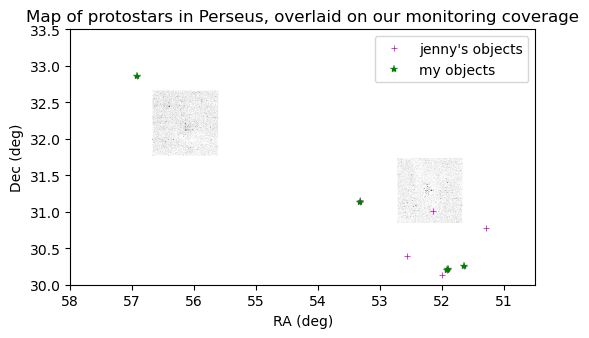

In [182]:
fig, ax = plt.subplots(1, dpi=100)

plt.plot(np.degrees(ngc_spread['median']['RA']), np.degrees(ngc_spread['median']['DEC']), 'k,', alpha=0.01)
plt.plot(np.degrees(ic_spread['median']['RA']), np.degrees(ic_spread['median']['DEC']), 'k,', alpha=0.01)

ax.set_aspect(1/np.cos(np.radians(31.8)))
ax.invert_xaxis()

ax.set_xlabel("RA (deg)")
ax.set_ylabel("Dec (deg)")
ax.set_title("Map of protostars in Perseus, overlaid on our monitoring coverage")

plt.plot(jenny_coords.ra, jenny_coords.dec, 'm+', ms=5, mew=0.5, label="jenny's objects") # , scalex=False, scaley=False)
plt.plot(tom_coords.ra, tom_coords.dec, 'g*', mew=0.2, label="my objects")

# ax.set_xlim(67.5, 50.5)
# ax.set_ylim(24,33.5)

ax.set_xlim(58, 50.5)
ax.set_ylim(30,33.5)

plt.legend()

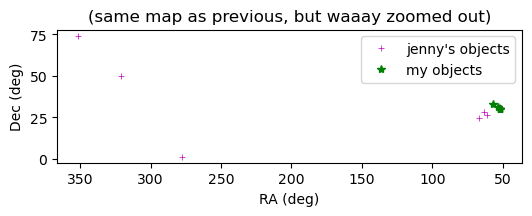

In [180]:
fig, ax = plt.subplots(1, dpi=100)

plt.plot(np.degrees(ngc_spread['median']['RA']), np.degrees(ngc_spread['median']['DEC']), 'k,', alpha=0.01)
plt.plot(np.degrees(ic_spread['median']['RA']), np.degrees(ic_spread['median']['DEC']), 'k,', alpha=0.01)

ax.set_aspect(1/np.cos(np.radians(31.8)))
ax.invert_xaxis()

ax.set_xlabel("RA (deg)")
ax.set_ylabel("Dec (deg)")
ax.set_title("(same map as previous, but waaay zoomed out)")

plt.plot(jenny_coords.ra, jenny_coords.dec, 'm+', ms=5, mew=0.5, label="jenny's objects") # , scalex=False, scaley=False)
plt.plot(tom_coords.ra, tom_coords.dec, 'g*', label="my objects")

# ax.set_xlim(67.5, 50.5)
# ax.set_ylim(24,33.5)

# ax.set_xlim(58, 50.5)
# ax.set_ylim(30,33.5)

plt.legend()

In [8]:
np.cos(np.radians(31))

0.8571673007021123

In [9]:
np.cos(31)

0.9147423578045313

In [10]:
np.cos?

In [23]:
# Now let's try to read in Jenny's table.

In [69]:
loc = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/data/auxiliary_catalogs/c2d_Perseus/Bergner_2017_Table1_apjaa72f6t1_ascii.txt"
loc_csv = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/data/auxiliary_catalogs/c2d_Perseus/Bergner_2017_Table1_apjaa72f6t1_ascii.csv"

tab = astropy.table.Table.read(loc_csv, data_start=2)
df = pd.read_csv(loc_csv, header=[0], skiprows=0)


In [79]:
df = df.drop(0)

In [168]:
df

,Source,R.A.,Decl.,Cloud,L_bol,M_env,alpha_IR^a,N(CH_3OH),N(H_2O_(ice))^a,${X}_{{\mathrm{CH}}_{3}\mathrm{OH}(\mathrm{ice})}$ ^b,${X}_{{\mathrm{NH}}_{3}(\mathrm{ice})}$ ^b,rms
1,B1-a^c,03:33:16.67,31:07:55.1,Perseus,1.3^d,2.8^d,1.87,10.21 [3.24],10.39 [2.26],<1.9,3.33 [0.98],3.6
2,B1-c,03:33:17.89,31:09:31.0,Perseus,3.7^d,17.7^d,2.66,1.69 [0.51],29.55 [5.65],<7.1,<4.04,5.5
3,B5 IRS1^c,03:47:41.61,32:51:43.8,Perseus,4.7^d,4.2^d,0.78,1.77 [0.46],2.26 [0.28],<3.7,<2.09,7
4,HH 300,04:26:56.30,24:43:35.3,Taurus,1.27^e,0.03^f,0.79,0.24 [0.10],2.59 [0.25],<6.7,3.46 [0.90],5.8
5,IRAS 03235+3004^c,03:26:37.45,30:15:27.9,Perseus,1.9^d,2.4^d,1.44,1.17 [0.08],14.48 [2.26],4.2 [1.2],4.71 [1.00],4.2
6,IRAS 03245+3002,03:27:39.03,30:12:59.3,Perseus,7.0^d,5.3^d,2.70,1.54 [0.29],39.31 [5.65],<9.8,<4.40,3.7
7,IRAS 03254+3050,03:28:34.51,31:00:51.2,Perseus,...,0.3^d,0.90,...,3.66 [0.47],<4.6,6.66 [1.37],3.9
8,IRAS 03271+3013,03:30:15.16,30:23:48.8,Perseus,0.8^d,1.2^d,2.06,0.42 [0.04],7.69 [1.76],<5.6,6.37 [1.86],4.8
9,IRAS 04108+2803^c,04:13:54.72,28:11:32.9,Taurus,0.62^e,...,0.90,1.04 [0.44],2.87 [0.4],<3.5,4.29 [1.03],4
10,IRAS 23238+7401,23:25:46.65,74:17:37.2,CB244,...,...,0.95,2.19 [1.01],12.95 [2.26],<3.6,<1.24,2.7


In [89]:
ra = df['R.A.'].values
dec = df['Decl.'].values

jenny_coords = SkyCoord(ra, dec, unit=('hour', 'deg'))

In [95]:
jenny_coords.dec

<Latitude [31.13197222, 31.15861111, 32.86216667, 24.72647222, 30.25775   ,
           30.21647222, 31.01422222, 30.39688889, 28.19247222, 74.29366667,
           49.98583333, 30.77269444, 30.13366667, 30.208     , 26.31566667,
            1.21683333] deg>

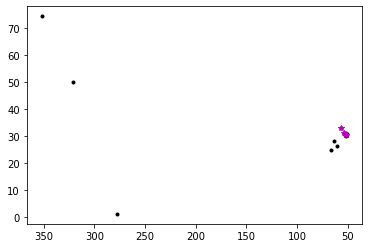

In [125]:
plt.plot(jenny_coords.ra, jenny_coords.dec, 'k.')
plt.plot(tom_coords.ra, tom_coords.dec, 'm*')
plt.gca().invert_xaxis()

In [121]:
tom_csv = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/data/auxiliary_catalogs/c2d_Perseus/toms_sources_Bergner_2017_Table1_apjaa72f6t1_ascii.csv"

tom_df = pd.read_csv(tom_csv, header=[0], skiprows=0).drop(0)


In [122]:
tom_df

,Source,R.A.,Decl.,Cloud,L_bol,M_env,alpha_IR^a,N(CH_3OH),N(H_2O_(ice))^a,${X}_{{\mathrm{CH}}_{3}\mathrm{OH}(\mathrm{ice})}$ ^b,${X}_{{\mathrm{NH}}_{3}(\mathrm{ice})}$ ^b,rms
1,B1-a^c,03:33:16.67,31:07:55.1,Perseus,1.3^d,2.8^d,1.87,10.21 [3.24],10.39 [2.26],<1.9,3.33 [0.98],3.6
2,B5 IRS1^c,03:47:41.61,32:51:43.8,Perseus,4.7^d,4.2^d,0.78,1.77 [0.46],2.26 [0.28],<3.7,<2.09,7
3,IRAS 03235+3004^c,03:26:37.45,30:15:27.9,Perseus,1.9^d,2.4^d,1.44,1.17 [0.08],14.48 [2.26],4.2 [1.2],4.71 [1.00],4.2
4,IRAS 03245+3002,03:27:39.03,30:12:59.3,Perseus,7.0^d,5.3^d,2.70,1.54 [0.29],39.31 [5.65],<9.8,<4.40,3.7
5,L1455 SMM1,03:27:43.25,30:12:28.8,Perseus,3.1^d,5.3^d,2.41,1.48 [0.76],18.21 [2.82],<13.5,<8.29,4.1


In [123]:
tom_ra = tom_df['R.A.'].values
tom_dec = tom_df['Decl.'].values

tom_coords = SkyCoord(tom_ra, tom_dec, unit=('hour', 'deg'))

In [132]:
bounds = (jenny_coords.ra.deg < 54) & (jenny_coords.ra.deg > 51)

ValueError: Transform `frame` must be a frame name, class, or instance

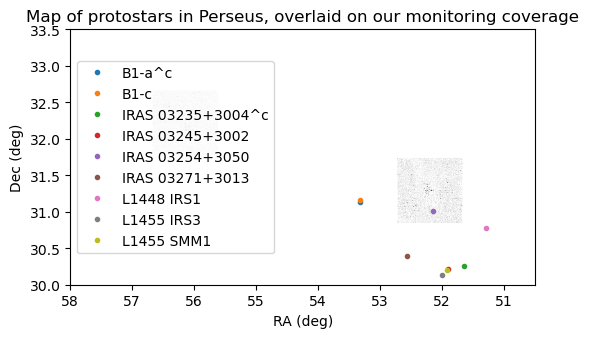

In [151]:
fig, ax = plt.subplots(1, dpi=100)

plt.plot(np.degrees(ngc_spread['median']['RA']), np.degrees(ngc_spread['median']['DEC']), 'k,', alpha=0.01)
plt.plot(np.degrees(ic_spread['median']['RA']), np.degrees(ic_spread['median']['DEC']), 'k,', alpha=0.01)

ax.set_aspect(1/np.cos(np.radians(31.8)))
ax.invert_xaxis()

ax.set_xlabel("RA (deg)")
ax.set_ylabel("Dec (deg)")
ax.set_title("Map of protostars in Perseus, overlaid on our monitoring coverage")

for i, (jra, jdec) in enumerate(zip(jenny_coords.ra.deg[bounds], jenny_coords.dec.deg[bounds])):
    name = df['Source'][bounds].iloc[i]
    plt.plot(jra, jdec, '.', label=name)

# plt.plot(jenny_coords.ra, jenny_coords.dec, 'm+', ms=5, mew=0.5) # , scalex=False, scaley=False)
# plt.plot(tom_coords.ra, tom_coords.dec, 'g*')

# ax.set_xlim(67.5, 50.5)
# ax.set_ylim(24,33.5)

ax.set_xlim(58, 50.5)
ax.set_ylim(30,33.5)

plt.legend(loc='center left')

In [147]:
df['Source'][bounds]

1                B1-a^c
2                  B1-c
5     IRAS 03235+3004^c
6       IRAS 03245+3002
7       IRAS 03254+3050
8       IRAS 03271+3013
12           L1448 IRS1
13           L1455 IRS3
14           L1455 SMM1
Name: Source, dtype: object

In [157]:
sm = ngc_spread["median"]
spreadsheet_coordinates = SkyCoord(
    ra=sm["RA"].values * u.rad, dec=sm["DEC"].values * u.rad
)

idx, d2d, d3d = jenny_coords.match_to_catalog_sky(spreadsheet_coordinates)


(array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

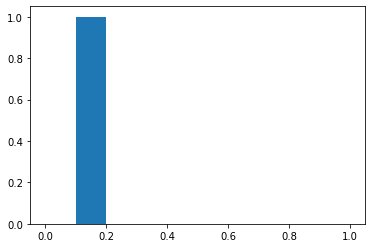

In [169]:
plt.subplots(1)
# plt.hist(d2d.to(u.arcsec).value, bins=50, range=(0,1), label='All NGC 1333 members')
plt.hist(d2d.to(u.arcsec).value, range=(0, 1))

In [160]:
d2d.to(u.arcsec)

<Angle [1.82574519e+03, 1.83707220e+03, 1.33937877e+04, 4.96970271e+04,
        2.10472544e+03, 2.25374194e+03, 1.08318123e-01, 1.60142814e+03,
        3.49908463e+04, 1.85914453e+05, 2.39889686e+05, 1.26167868e+03,
        2.54684568e+03, 2.28101027e+03, 3.12852397e+04, 4.52022759e+05] arcsec>

In [161]:
max_sep = 0.37 * u.arcsec
sep_constraint = d2d < max_sep

# We're going to compute
# (a) all matched IC348 members, for quality control / comparisons, and
# (b) just the brown dwarfs

matches = sm.iloc[idx[sep_constraint]]
matched = df[sep_constraint]

In [162]:
matched

,Source,R.A.,Decl.,Cloud,L_bol,M_env,alpha_IR^a,N(CH_3OH),N(H_2O_(ice))^a,${X}_{{\mathrm{CH}}_{3}\mathrm{OH}(\mathrm{ice})}$ ^b,${X}_{{\mathrm{NH}}_{3}(\mathrm{ice})}$ ^b,rms
7,IRAS 03254+3050,03:28:34.51,31:00:51.2,Perseus,...,0.3^d,0.9,...,3.66 [0.47],<4.6,6.66 [1.37],3.9


In [163]:
matches

,MEANMJDOBS,RA,DEC,JMHPNT,JMHPNTERR,HMKPNT,HMKPNTERR,JAPERMAG3,JAPERMAG3ERR,HAPERMAG3,...,KAPERMAG3,KAPERMAG3ERR,JPPERRBITS,HPPERRBITS,KPPERRBITS,MERGEDCLASS,PSTAR,JGRADE,HGRADE,KGRADE
SOURCEID,,,,,,,,,,,,,,,,,,,,,
44508746136559,56243.57007,0.91008,0.5413,1.890632,0.023636,1.570638,0.02138,15.841434,0.01264,13.935937,...,12.351698,0.008417,0.0,0.0,0.0,1.0,0.000171,0.976589,0.976636,0.984756


In [164]:
protostar = 44508746136559

In [171]:
from wuvars.plotting.lightcurve import simple_lc, simple_lc_brokenaxes, ngc1333_simple_lc_brokenaxes, ngc1333_simple_lc_scatter_brokenaxes
from wuvars.analysis.sidsep import sidsep

dat = photometry.group_wserv_v2(photometry.load_wserv_v2(7))

Loading WSERV7 photometry data... DONE (elapsed time: 0.23s)


Text(0.5, 1.0, 'Lightcurve of embedded protostar IRAS 03254+3050\n(Sourceid 44508746136559 in WSERV7/NGC 1333)')

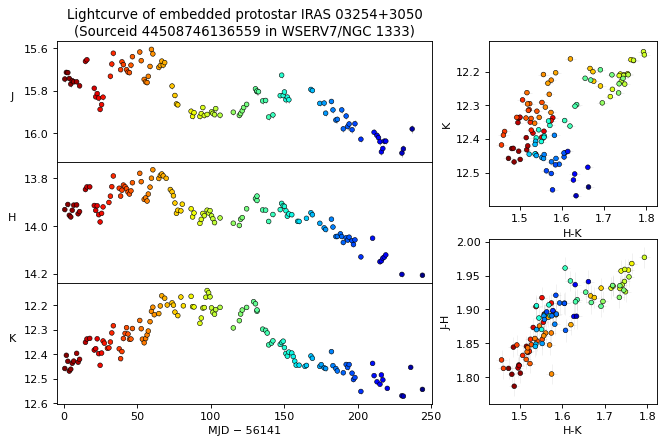

In [176]:
fig_lc = ngc1333_simple_lc_scatter_brokenaxes(dat, protostar, cmap='jet_r')
fig_lc.ax_j.set_title(f"Lightcurve of embedded protostar IRAS 03254+3050\n(Sourceid {protostar} in WSERV7/NGC 1333)")

# Conclusion

Of the 16 protostars in Jenny's paper (9 of which are in Perseus), only one is within our two fields (it's in NGC 1333).

But - man, what a lightcurve. Definitely motivates a further study of any embedded protostars in our field of view.